In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import librosa
import librosa.display
import IPython.display as pld
import warnings
warnings.filterwarnings('ignore')
import csv
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf

In [2]:
df1=pd.read_csv('D:/database/emodb_database/emodb_related/5FOLD_FEATURE_MFCC_SPECTRO_MELSPECTRO/train_fold1.csv')
df1

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,Label
0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,1.597646,...,-45.240173,-45.363280,-45.879322,-46.481182,-46.570095,-47.360413,-47.750618,-47.903170,-48.483600,0
1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,7.846351,...,-46.295320,-47.028522,-47.197605,-47.293780,-47.483273,-47.512413,-47.718765,-47.775368,-48.055780,1
2,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,2.848643,...,-42.501133,-42.765945,-43.091175,-42.944620,-43.680280,-43.887970,-44.003820,-44.409420,-44.809220,1
3,-433.33972,29.850212,-8.025759,23.749544,1.409119,8.578079,-4.816757,-7.580163,-22.596510,-2.976218,...,-36.506588,-37.618206,-38.790203,-39.685270,-40.331455,-40.937477,-41.497940,-41.881230,-43.639440,2
4,-465.22060,37.216230,-27.930758,18.472618,-4.044474,3.874021,-12.937754,-11.636196,-20.833626,-7.707160,...,-41.530040,-42.638220,-42.284863,-42.429565,-42.922200,-43.130000,-43.366444,-43.435005,-44.453370,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,-403.50656,30.989262,-12.756512,27.214573,-10.573180,-0.137991,-15.470394,-8.865036,-16.384440,-6.866915,...,-34.487267,-34.567345,-34.590600,-35.866120,-37.360188,-38.068150,-38.460350,-38.834790,-40.776142,4
424,-478.05527,5.705422,-24.631056,27.622614,-19.235449,-7.040019,-13.293165,-9.629133,-14.067036,-12.944608,...,-38.769540,-39.537735,-39.972637,-40.451378,-41.208780,-41.404150,-41.818394,-42.048710,-44.061230,0
425,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,-1.778869,...,-35.943295,-35.991962,-35.932570,-36.347110,-36.846870,-36.988113,-37.368084,-37.830276,-39.131287,3
426,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,2.523657,...,-40.679604,-40.977142,-41.159206,-41.518005,-41.833910,-42.371326,-42.683025,-43.457855,-44.400280,3


In [3]:
df2=pd.read_csv('D:/database/emodb_database/emodb_related/5FOLD_FEATURE_MFCC_SPECTRO_MELSPECTRO/test_fold1.csv')
df2

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,Label
0,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,-2.445232,...,-39.167060,-40.027214,-39.859190,-40.546265,-41.159770,-41.594917,-41.895184,-42.361374,-43.036694,2
1,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,-7.022445,...,-38.988815,-39.171722,-38.806175,-39.247160,-40.507256,-41.320390,-42.015858,-42.587345,-43.111560,0
2,-451.45264,71.335200,12.223010,32.649555,3.997801,15.200773,-2.812883,-1.384373,-6.467040,-0.458348,...,-40.219190,-40.858000,-41.127342,-41.930145,-41.992610,-42.172690,-42.495354,-42.414940,-43.698486,3
3,-478.92007,56.887730,-9.496516,12.799419,-0.196528,3.286758,-9.909594,-2.337262,-7.694031,-0.081845,...,-41.129734,-41.564762,-41.957882,-42.421764,-42.679916,-43.460820,-43.697144,-43.954445,-44.532967,0
4,-438.46402,94.930030,5.689025,25.277182,2.760727,18.562307,-5.944632,-2.279853,-1.935391,0.269705,...,-42.468250,-43.519947,-44.095420,-44.993350,-45.916496,-46.257440,-47.128906,-47.539740,-48.126812,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-427.61200,36.440388,-21.528141,13.495537,-19.663698,4.418462,-20.588242,-13.769891,-17.446966,-3.357204,...,-39.146650,-39.952780,-40.792465,-41.040590,-41.648460,-42.222190,-42.736435,-43.174180,-43.961113,4
103,-392.73694,58.074574,-2.923840,40.999270,-16.602533,12.707182,-17.690449,-5.038430,-16.203160,-11.047191,...,-39.643420,-40.428260,-41.158066,-41.458900,-41.589450,-41.891590,-42.239746,-42.773506,-43.049450,5
104,-429.41583,51.232320,-4.127894,38.715740,2.253632,-2.197497,-15.981533,-14.225066,-17.897070,-6.940356,...,-33.551075,-34.568836,-35.739170,-36.013790,-36.667175,-37.571487,-38.467117,-38.914436,-40.692837,6
105,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,-3.372870,...,-39.212227,-39.977900,-40.401627,-41.137398,-42.249664,-42.467660,-43.003273,-43.385807,-44.159645,5


In [4]:
df1['Label'].unique()

array([0, 1, 2, 4, 5, 3, 6], dtype=int64)

In [5]:
df2['Label'].unique()

array([2, 0, 3, 4, 5, 1, 6], dtype=int64)

In [6]:
x_train=df1.iloc[:,0:40]
y_train=df1.iloc[:,-1]

In [7]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-482.45233,62.835957,-0.348998,26.264595,2.978607,6.900927,-13.006243,0.273391,-9.196591,1.597646,...,-3.409270,-5.413244,-9.903300,-9.461795,-11.410793,-7.792785,-4.598618,-1.893468,0.230821,-0.455839
1,-469.48477,88.400730,-7.127512,29.156132,5.335554,7.147227,-6.727572,-8.307674,-3.364513,7.846351,...,-5.047899,-6.706718,-10.045481,-11.882533,-12.027461,-10.450580,-6.670032,-3.885782,-0.594336,-1.361155
2,-447.12630,86.114920,4.772520,38.097256,8.324276,8.538317,-4.507682,-7.680664,-7.317249,2.848643,...,-4.924419,-8.395385,-10.831446,-12.918998,-12.387193,-11.704714,-7.736867,-4.567762,-1.578654,-2.273726
3,-433.33972,29.850212,-8.025759,23.749544,1.409119,8.578079,-4.816757,-7.580163,-22.596510,-2.976218,...,-1.244043,-2.064129,-6.104688,-5.832867,-8.977280,-6.688210,-3.260823,0.824118,0.781745,0.663553
4,-465.22060,37.216230,-27.930758,18.472618,-4.044474,3.874021,-12.937754,-11.636196,-20.833626,-7.707160,...,0.624938,-2.627773,-6.224145,-5.900144,-6.796574,-5.059247,-3.126794,-0.616650,0.452239,2.060410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,-403.50656,30.989262,-12.756512,27.214573,-10.573180,-0.137991,-15.470394,-8.865036,-16.384440,-6.866915,...,0.713344,-5.716830,-9.078898,-7.540874,-10.180085,-9.958347,-7.815684,-1.593384,0.629178,0.417870
424,-478.05527,5.705422,-24.631056,27.622614,-19.235449,-7.040019,-13.293165,-9.629133,-14.067036,-12.944608,...,-3.103043,-1.358022,-5.903406,-7.919778,-8.527031,-5.558409,-5.229014,-1.876254,-0.876703,1.280706
425,-427.36716,51.473750,4.835125,40.900140,6.937289,13.700687,-8.331753,-0.583414,-6.279562,-1.778869,...,3.584273,0.085885,-3.021229,-6.543844,-7.785308,-8.447594,-3.718233,-2.430141,-1.299946,-0.641451
426,-467.15588,52.217026,10.470471,47.414780,8.690019,15.601270,-2.032935,4.985774,-7.432734,2.523657,...,-4.083610,-4.791102,-7.304545,-7.000581,-8.297956,-6.995429,-3.757356,-2.086286,-0.455316,0.501709


In [8]:
y_train

0      0
1      1
2      1
3      2
4      2
      ..
423    4
424    0
425    3
426    3
427    2
Name: Label, Length: 428, dtype: int64

In [9]:
x_test=df2.iloc[:,0:40]
y_test=df2.iloc[:,-1]

In [10]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-434.88647,41.972150,-29.416862,18.537344,-4.156565,5.257353,-11.410935,-8.983023,-11.285996,-2.445232,...,-2.040512,-3.035521,-5.395728,-6.573817,-7.666299,-6.801901,-3.527732,1.548335,0.199676,2.296331
1,-454.89886,45.067265,-0.193278,15.111545,3.080835,4.204241,-10.440731,-6.615343,-16.249382,-7.022445,...,-1.957219,-4.853336,-5.930995,-6.787319,-8.053974,-7.839906,-5.059597,0.171459,1.393567,-0.334069
2,-451.45264,71.335200,12.223010,32.649555,3.997801,15.200773,-2.812883,-1.384373,-6.467040,-0.458348,...,-5.814621,-7.375133,-9.253906,-13.409129,-13.250784,-10.141157,-8.428322,-4.184497,-1.042085,-2.143427
3,-478.92007,56.887730,-9.496516,12.799419,-0.196528,3.286758,-9.909594,-2.337262,-7.694031,-0.081845,...,-1.695661,-2.949524,-5.888940,-5.720297,-8.503425,-7.204069,-4.506225,-0.749910,0.905588,0.403672
4,-438.46402,94.930030,5.689025,25.277182,2.760727,18.562307,-5.944632,-2.279853,-1.935391,0.269705,...,-4.460831,-8.874384,-11.399489,-15.357148,-15.001076,-13.406792,-7.612884,-3.890465,-0.899644,-1.795227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-427.61200,36.440388,-21.528141,13.495537,-19.663698,4.418462,-20.588242,-13.769891,-17.446966,-3.357204,...,-1.847933,-4.570992,-6.088420,-8.137559,-10.292571,-7.977092,-4.881195,-0.471749,1.103058,1.776349
103,-392.73694,58.074574,-2.923840,40.999270,-16.602533,12.707182,-17.690449,-5.038430,-16.203160,-11.047191,...,-1.936344,-4.539963,-6.211244,-8.167674,-8.029004,-8.877050,-4.065097,-2.732378,0.156973,0.560711
104,-429.41583,51.232320,-4.127894,38.715740,2.253632,-2.197497,-15.981533,-14.225066,-17.897070,-6.940356,...,0.079239,-2.507436,-7.004658,-7.828276,-9.641785,-7.875704,-3.914696,-0.331641,0.374041,1.034180
105,-418.62490,57.015880,6.383415,47.618423,-8.051490,4.213936,-15.029120,-2.448467,-10.805821,-3.372870,...,-2.760351,-4.033802,-7.910801,-8.805643,-11.735242,-9.766793,-4.004450,-1.724268,1.669646,2.706617


In [11]:
y_test

0      2
1      0
2      3
3      0
4      3
      ..
102    4
103    5
104    6
105    5
106    2
Name: Label, Length: 107, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

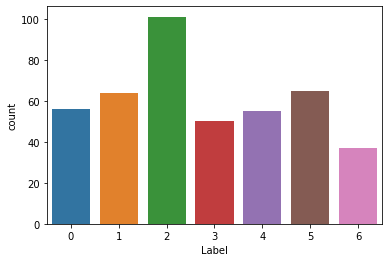

In [12]:
sns.countplot(df1['Label'])

<AxesSubplot:xlabel='Label', ylabel='count'>

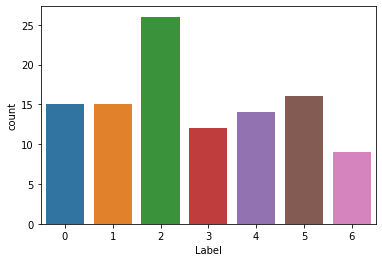

In [13]:
sns.countplot(df2['Label'])

In [14]:
# from sklearn.model_selection import train_test_split

In [15]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [16]:
# x_train

In [17]:
# y_train

In [18]:
# x_test

In [19]:
# y_test

In [20]:
#Check unique values for y_test
y_test.unique()

array([2, 0, 3, 4, 5, 1, 6], dtype=int64)

In [21]:
#Check unique values for y_train
y_train.unique()

array([0, 1, 2, 4, 5, 3, 6], dtype=int64)

In [22]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 1.0918367346938775,
 1: 0.9553571428571429,
 2: 0.6053748231966054,
 3: 1.2228571428571429,
 4: 1.1116883116883116,
 5: 0.9406593406593406,
 6: 1.6525096525096525}

In [23]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(x_train)
X_train_scalled = scaler.transform(x_train)
X_test_scalled = scaler.transform(x_test)

In [24]:
#Import packages for CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling1D
# from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2


In [25]:
import random
res = [] 
for j in range(4):
    res.append(random.randint(300, 1000))
# res.sort(reverse=True)
print(res)

[741, 951, 452, 920]


In [26]:
ANN_model = Sequential()

ANN_model.add(Dense(999,input_shape=(X_train_scalled.shape[1],),activation='elu')),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.1)),
#LAYER1
ANN_model.add(Dense(785,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
#kernel_regularizer=l2(0.001)
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.2)),

#LAYER2
ANN_model.add(Dense(865,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.2)),

#LAYER3
ANN_model.add(Dense(672,activation='elu')),
#kernel_regularizer=l2(0.01),bias_regularizer=l2(0.01),
ANN_model.add(BatchNormalization()),
ANN_model.add(Dropout(0.3)),
ANN_model.add(Dense(7,activation='softmax')),
ANN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 batch_normalization (BatchN  (None, 40)               160       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 785)               32185     
                                                                 
 batch_normalization_1 (Batc  (None, 785)              3140      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 785)               0

In [27]:
import os
import tempfile
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
ANN_model.save_weights(initial_weights)

In [28]:
ANN_model.load_weights(initial_weights)

In [29]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
ANN_model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',                             #CategoricalCrossentropy
              metrics=['SparseCategoricalAccuracy'])
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 batch_normalization (BatchN  (None, 40)               160       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 785)               32185     
                                                                 
 batch_normalization_1 (Batc  (None, 785)              3140      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 785)               0

In [30]:
checkpoint_path='Ann_EMODB_MFCC_5fold1_elu.ckpt'
checkpoint_dir=os.path.dirname(checkpoint_path)
callback1=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_sparse_categorical_accuracy', verbose=1,
   save_best_only=True,save_weights_only=True,)
callback2=tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy',min_delta=0, patience=300, verbose=0, mode='auto',baseline=None,restore_best_weights=True)
cp_callback=[callback1,callback2]

In [31]:
history = ANN_model.fit(X_train_scalled, y_train, validation_data=(X_test_scalled, y_test), batch_size=64, epochs=1000, verbose=1,class_weight=class_weights,callbacks=cp_callback)

Epoch 1/1000
5/7 [====================>.........] - ETA: 0s - loss: 2.5445 - sparse_categorical_accuracy: 0.2094 
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.68224, saving model to Ann_EMODB_MFCC_5fold1_elu.ckpt
7/7 [==============================] - 2s 90ms/step - loss: 2.2792 - sparse_categorical_accuracy: 0.2850 - val_loss: 1.4775 - val_sparse_categorical_accuracy: 0.6822
Epoch 2/1000
5/7 [====================>.........] - ETA: 0s - loss: 1.5660 - sparse_categorical_accuracy: 0.4656
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.68224
7/7 [==============================] - 0s 20ms/step - loss: 1.5691 - sparse_categorical_accuracy: 0.4743 - val_loss: 1.2850 - val_sparse_categorical_accuracy: 0.6542
Epoch 3/1000
5/7 [====================>.........] - ETA: 0s - loss: 1.3711 - sparse_categorical_accuracy: 0.5281
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.68224
7/7 [==============================] - 0s 22ms/step - loss: 1.3691 - 

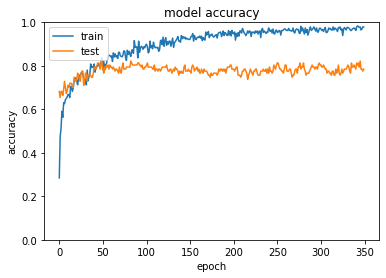

In [32]:
#Plot model accuracy over ephocs
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
ANN_model.load_weights(checkpoint_path) #to load model with highest accuracy

In [34]:
# Calculate pre-training accuracy 
score = ANN_model.evaluate(X_test_scalled, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

4/4 [==============================] - 0s 4ms/step - loss: 0.5576 - sparse_categorical_accuracy: 0.8224
Pre-training accuracy: 82.2430%


In [35]:
# Evaluating the model on the training and testing set
score = ANN_model.evaluate(X_train_scalled, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = ANN_model.evaluate(X_test_scalled, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9485981464385986
Testing Accuracy:  0.822429895401001


In [36]:
#Get predictions from model
y_test_predictions = ANN_model.predict(X_test_scalled) # it will give the prediction data of the model

4/4 [==============================] - 0s 3ms/step


In [37]:
y_test_predictions.shape

(107, 7)

In [38]:
y_test_predictions

array([[6.78403443e-03, 4.43825884e-05, 9.78085816e-01, 1.89180413e-04,
        7.74362532e-04, 7.01641766e-05, 1.40520073e-02],
       [6.83543801e-01, 1.79872313e-03, 1.63912773e-01, 4.40043630e-04,
        1.19995736e-01, 1.19579134e-04, 3.01893074e-02],
       [1.57002782e-04, 3.58638197e-01, 1.25958640e-02, 3.99456471e-01,
        1.45260999e-02, 7.40190148e-02, 1.40607402e-01],
       [8.12437117e-01, 6.81268401e-04, 1.56933129e-01, 5.63077349e-03,
        2.64816009e-03, 5.83278481e-04, 2.10863631e-02],
       [6.97861178e-05, 1.00743733e-01, 3.29981733e-04, 5.69432735e-01,
        6.56181364e-04, 3.28318864e-01, 4.48747305e-04],
       [1.05306372e-01, 5.16027445e-04, 7.71665692e-01, 9.56289150e-05,
        1.87881794e-02, 7.74356769e-04, 1.02853782e-01],
       [1.95127558e-02, 5.62662084e-04, 9.77006137e-01, 3.08651101e-06,
        1.35588110e-03, 4.51432861e-05, 1.51426974e-03],
       [2.13858075e-02, 7.12241139e-03, 1.10892777e-03, 8.93028617e-01,
        7.98681937e-03, 5

In [39]:
# header = ['0','1','2','3','4','5','6','7'] # it is used to crate an csv file of header 0,1,2,3,4,5,6 here 0 foer angry,
# # 1 for disgust, 2 for fear 3 for happy 4 for neutral 5 for ps and 6 for sad
# with open("C:/Users/siba and suna/Desktop/fusion/EMODB_FUSION/FOLD1_SCORE/mfcc_score.csv", "a", newline="") as f:
#     writer = csv.writer(f)
#     writer.writerow(header)
    
# for i in range(len(y_test_predictions)):#here length is 35753 because shape is (35753,7) hence i is 0 to 35752
#     data=[]
#     for j in y_test_predictions[i]:
# #         print(j)#each row of y_test_predictions contain 7 elements i.e shape is (1,7) and j will
#         # will be read one by one elemnt of y_test_predictions and append to data, later data will write in hello.csv file
#         data.append(j)
#     with open("C:/Users/siba and suna/Desktop/fusion/EMODB_FUSION/FOLD1_SCORE/mfcc_score.csv", "a", newline="") as f:
#         writer = csv.writer(f)
#         writer.writerow(data)

In [40]:
y_test_predictions=np.argmax(y_test_predictions,axis=1)

In [41]:
y_test_predictions

array([2, 0, 3, 0, 3, 2, 2, 3, 4, 5, 3, 1, 2, 0, 0, 1, 0, 2, 0, 5, 3, 0,
       1, 3, 1, 2, 6, 2, 2, 5, 4, 1, 0, 4, 0, 4, 2, 1, 2, 1, 2, 4, 4, 4,
       1, 1, 1, 2, 0, 3, 2, 2, 5, 0, 2, 6, 3, 0, 5, 0, 4, 5, 0, 3, 1, 6,
       5, 2, 6, 1, 4, 5, 3, 3, 0, 6, 5, 0, 2, 5, 5, 6, 1, 2, 4, 1, 1, 2,
       2, 4, 1, 3, 1, 0, 0, 6, 4, 0, 0, 5, 4, 5, 4, 5, 6, 5, 2],
      dtype=int64)

In [42]:
# df.replace({ 'happyness': 0, 'neutral': 1,'anger': 2,'sadness': 3, 'fear':4,'boredom':5,'disgust':6}, inplace=True)

In [43]:
emotions={
 0: 'happyness',
 1: 'neutral',
 2: 'anger',
 3: 'sadness',
 4: 'fear',
 5: 'boredom',
 6: 'disgust',
}

In [44]:
label=[]
for i in y_test_predictions:
    label1=emotions[i]
    label.append(label1)
label
y_pred_acc=np.array(label)

In [45]:
y_pred_acc

array(['anger', 'happyness', 'sadness', 'happyness', 'sadness', 'anger',
       'anger', 'sadness', 'fear', 'boredom', 'sadness', 'neutral',
       'anger', 'happyness', 'happyness', 'neutral', 'happyness', 'anger',
       'happyness', 'boredom', 'sadness', 'happyness', 'neutral',
       'sadness', 'neutral', 'anger', 'disgust', 'anger', 'anger',
       'boredom', 'fear', 'neutral', 'happyness', 'fear', 'happyness',
       'fear', 'anger', 'neutral', 'anger', 'neutral', 'anger', 'fear',
       'fear', 'fear', 'neutral', 'neutral', 'neutral', 'anger',
       'happyness', 'sadness', 'anger', 'anger', 'boredom', 'happyness',
       'anger', 'disgust', 'sadness', 'happyness', 'boredom', 'happyness',
       'fear', 'boredom', 'happyness', 'sadness', 'neutral', 'disgust',
       'boredom', 'anger', 'disgust', 'neutral', 'fear', 'boredom',
       'sadness', 'sadness', 'happyness', 'disgust', 'boredom',
       'happyness', 'anger', 'boredom', 'boredom', 'disgust', 'neutral',
       'anger', 'f

In [46]:
y_test

0      2
1      0
2      3
3      0
4      3
      ..
102    4
103    5
104    6
105    5
106    2
Name: Label, Length: 107, dtype: int64

In [47]:
emotion={
 0: 'happyness',
 1: 'neutral',
 2: 'anger',
 3: 'sadness',
 4: 'fear',
 5: 'boredom',
 6: 'disgust',
}

In [48]:
label_test=[]
for i in y_test:
    label_test.append(emotion[i])
label_test
y_true_accu=np.array(label_test) 
    

In [49]:
y_true_accu

array(['anger', 'happyness', 'sadness', 'happyness', 'sadness', 'fear',
       'anger', 'sadness', 'fear', 'boredom', 'sadness', 'neutral',
       'anger', 'anger', 'happyness', 'neutral', 'happyness', 'anger',
       'happyness', 'boredom', 'sadness', 'happyness', 'neutral',
       'sadness', 'neutral', 'anger', 'disgust', 'anger', 'anger',
       'sadness', 'fear', 'neutral', 'anger', 'fear', 'happyness', 'fear',
       'happyness', 'neutral', 'anger', 'boredom', 'anger', 'fear',
       'happyness', 'happyness', 'neutral', 'boredom', 'neutral', 'anger',
       'happyness', 'sadness', 'anger', 'anger', 'boredom', 'anger',
       'anger', 'fear', 'sadness', 'anger', 'boredom', 'anger', 'fear',
       'boredom', 'happyness', 'disgust', 'boredom', 'disgust', 'boredom',
       'anger', 'disgust', 'neutral', 'fear', 'boredom', 'sadness',
       'sadness', 'anger', 'disgust', 'neutral', 'happyness', 'anger',
       'boredom', 'boredom', 'disgust', 'neutral', 'anger', 'fear',
       'neutral

In [50]:
#DataFlair - Calculate the accuracy of our model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=y_true_accu, y_pred=y_pred_acc)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.24%


In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_true_accu, y_pred=y_pred_acc)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_true_accu,y_pred_acc))

              precision    recall  f1-score   support

       anger       0.90      0.73      0.81        26
     boredom       0.87      0.81      0.84        16
     disgust       0.88      0.78      0.82         9
        fear       0.86      0.86      0.86        14
   happyness       0.60      0.80      0.69        15
     neutral       0.82      0.93      0.87        15
     sadness       0.92      0.92      0.92        12

    accuracy                           0.82       107
   macro avg       0.83      0.83      0.83       107
weighted avg       0.84      0.82      0.82       107



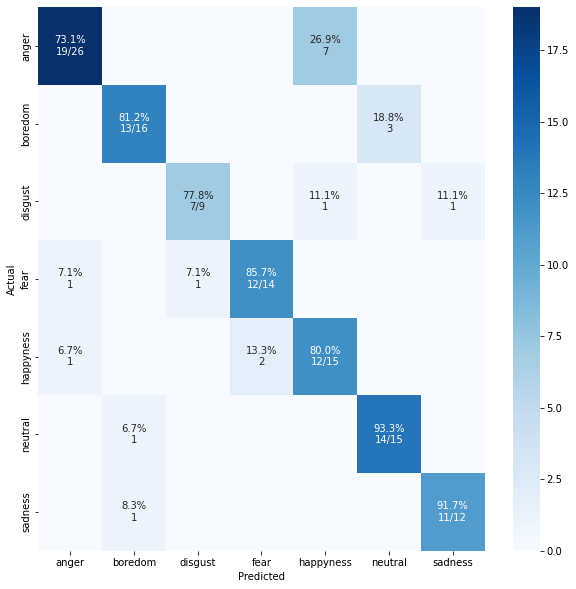

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    
plot_cm(y_true_accu, y_pred_acc)